In [28]:
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import os

# Load 3D Brain MRI image

In [49]:
# Load the .nii file using Nibabel
image = nb.load('/Kaggle/GM_Images/CN/mwp1ACK005_V1_t1_mprage_sag_p2_iso_TA_5_03_MPR_cor.nii')

# Transform the image in 3D-array format
image_data = image.get_fdata()

# Check the shape of 3D-MRI
print("The shape of 3D MRI is:",image_data.shape)

The shape of 3D MRI is: (113, 137, 113)


Explain the 3D shape, here here

In [50]:
def find_two_numbers(product):
    numbers = []
    for i in range(1, int(product**0.5) + 1):
        if product % i == 0:
            divisor = i
            quotient = product // i
            numbers.append((divisor, quotient))

    return numbers
    
def min_absolute_difference_pair(pairs):
    if len(pairs) < 2:
        raise ValueError("Size cannot be determined")
    
    min_difference_pair = pairs[0]
    min_absolute_difference = abs(pairs[0][0] - pairs[0][1])

    for pair in pairs[1:]:
        current_difference = abs(pair[0] - pair[1])
        if current_difference < min_absolute_difference:
            min_absolute_difference = current_difference
            min_difference_pair = pair

    return min_difference_pair

def get_subplot_size(number):
    pairs = find_two_numbers(number)
    subplot_size = min_absolute_difference_pair(pairs)

    return subplot_size

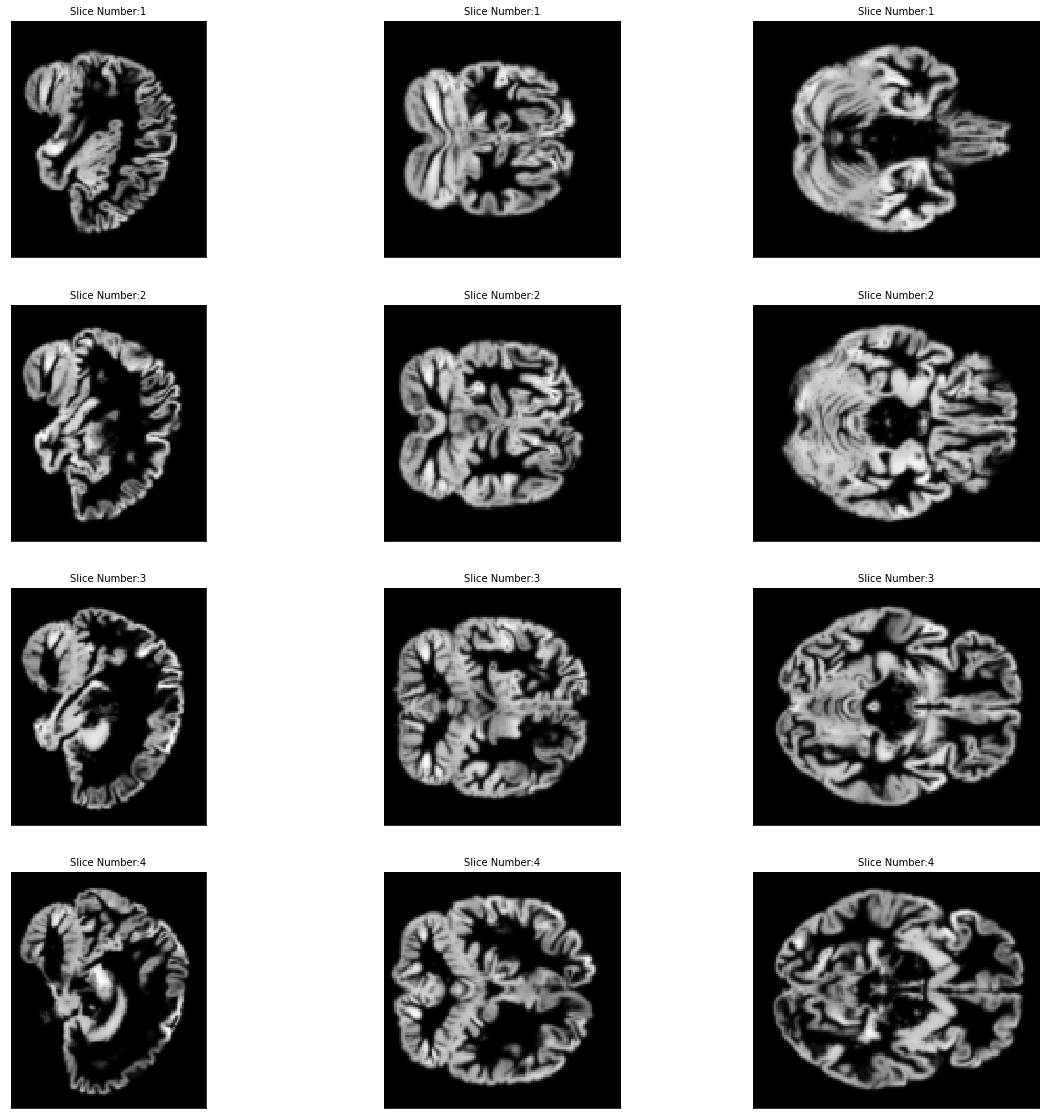

In [74]:
slices = []
for i in range(30,46,5):
    image_data = nb.load('/Kaggle/GM_Images/CN/mwp1ACK005_V1_t1_mprage_sag_p2_iso_TA_5_03_MPR_cor.nii').get_fdata()
    slices.append([image_data[i,:,:],image_data[:,i,:],image_data[:,:,i]])

fig = plt.figure(figsize=(20, 20))

for i in range(len(slices)):
    slice_list = [slices[i][0], slices[i][1], slices[i][2]]  # Fix here
    for k, a in enumerate(slice_list):
        idx = ((i+1)*3)+ (k-2)
        ax = fig.add_subplot(len(slices),3,idx)
        ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(f"Slice Number:{i+1}", fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])